In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split

In [ ]:
# 1. Load Dataset
file_path = "KDDTrain20.txt"

columns = [
    "duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot",
    "num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations",
    "num_shells","num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count",
    "serror_rate","srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate",
    "dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate",
    "dst_host_srv_rerror_rate","label","difficulty"
]

df = pd.read_csv(file_path, names=columns)

In [ ]:
# 2. Assign Attack Categorization
dos = ["back","land","neptune","pod","smurf","teardrop","mailbomb","processtable","udpstorm","apache2","worm"]
probe = ["satan","ipsweep","nmap","portsweep","mscan","saint"]
r2l = ["guess_passwd","ftp_write","imap","phf","multihop","warezmaster","warezclient","spy","xlock","xsnoop","snmpguess","snmpgetattack","httptunnel","sendmail","named"]
u2r = ["buffer_overflow","loadmodule","rootkit","perl","sqlattack","xterm","ps"]

def map_attack(label):
    label = label.strip()
    if label == "normal":
        return "Normal"
    elif label in dos:
        return "DoS"
    elif label in probe:
        return "Probe"
    elif label in r2l:
        return "R2L"
    elif label in u2r:
        return "U2R"
    else:
        return "Unknown"

df["attack_category"] = df["label"].apply(map_attack)

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty,attack_category
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,Normal
1,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,Normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,DoS
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,Normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,Normal


In [ ]:
# 3. Statistical data, missing value and duplicate
df.shape

(25192, 44)

In [ ]:
df.dtypes

,0
duration,int64
protocol_type,object
service,object
flag,object
src_bytes,int64
dst_bytes,int64
land,int64
wrong_fragment,int64
urgent,int64
hot,int64


In [ ]:
df.isnull().sum()

,0
duration,0
protocol_type,0
service,0
flag,0
src_bytes,0
dst_bytes,0
land,0
wrong_fragment,0
urgent,0
hot,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,25192.0,305.054104,2.686556e+03,0.0,0.00,0.00,0.00,42862.0
src_bytes,25192.0,24330.628215,2.410805e+06,0.0,0.00,44.00,279.00,381709090.0
dst_bytes,25192.0,3491.847174,8.883072e+04,0.0,0.00,0.00,530.25,5151385.0
land,25192.0,0.000079,8.909946e-03,0.0,0.00,0.00,0.00,1.0
wrong_fragment,25192.0,0.023738,2.602208e-01,0.0,0.00,0.00,0.00,3.0
urgent,25192.0,0.000040,6.300408e-03,0.0,0.00,0.00,0.00,1.0
hot,25192.0,0.198039,2.154202e+00,0.0,0.00,0.00,0.00,77.0
num_failed_logins,25192.0,0.001191,4.541818e-02,0.0,0.00,0.00,0.00,4.0
logged_in,25192.0,0.394768,4.888105e-01,0.0,0.00,0.00,1.00,1.0
num_compromised,25192.0,0.227850,1.041735e+01,0.0,0.00,0.00,0.00,884.0


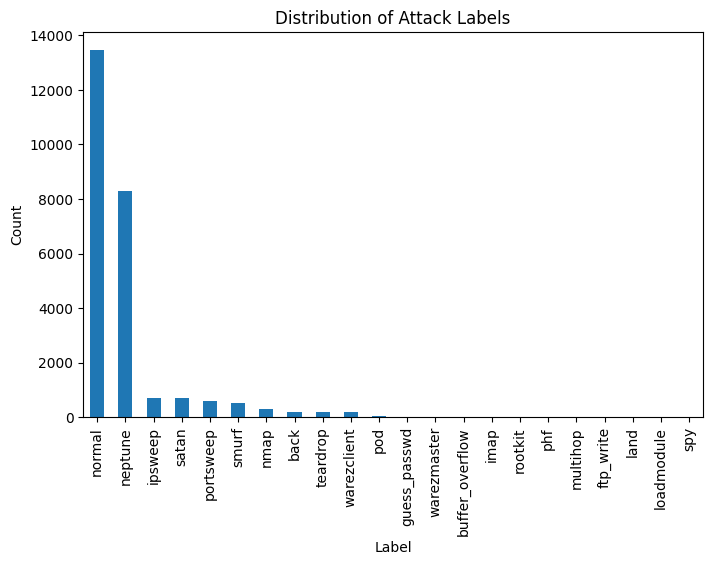

In [ ]:
# 4. Plot Label Distribution
plt.figure(figsize=(8,5))
df["label"].value_counts().plot(kind="bar")
plt.title("Distribution of Attack Labels")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

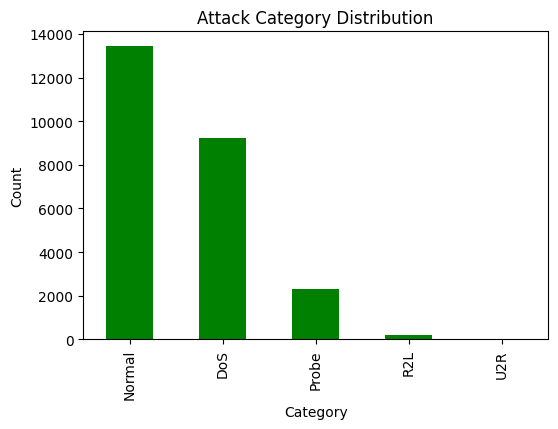

In [ ]:
# 5. Plot Attack Category Distribution

plt.figure(figsize=(6,4))
df["attack_category"].value_counts().plot(kind="bar", color="green")
plt.title("Attack Category Distribution")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

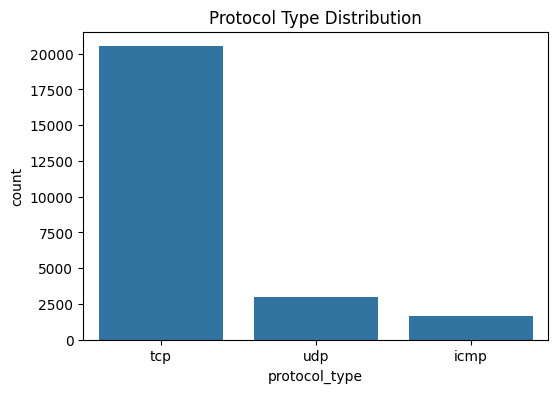

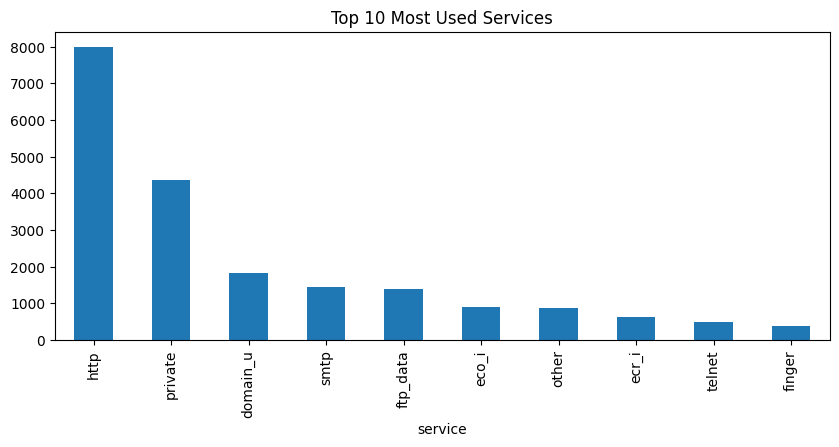

In [ ]:
# 6. Protocol & Service Counts
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="protocol_type")
plt.title("Protocol Type Distribution")
plt.show()

plt.figure(figsize=(10,4))
df["service"].value_counts().nlargest(10).plot(kind="bar")
plt.title("Top 10 Most Used Services")
plt.show()

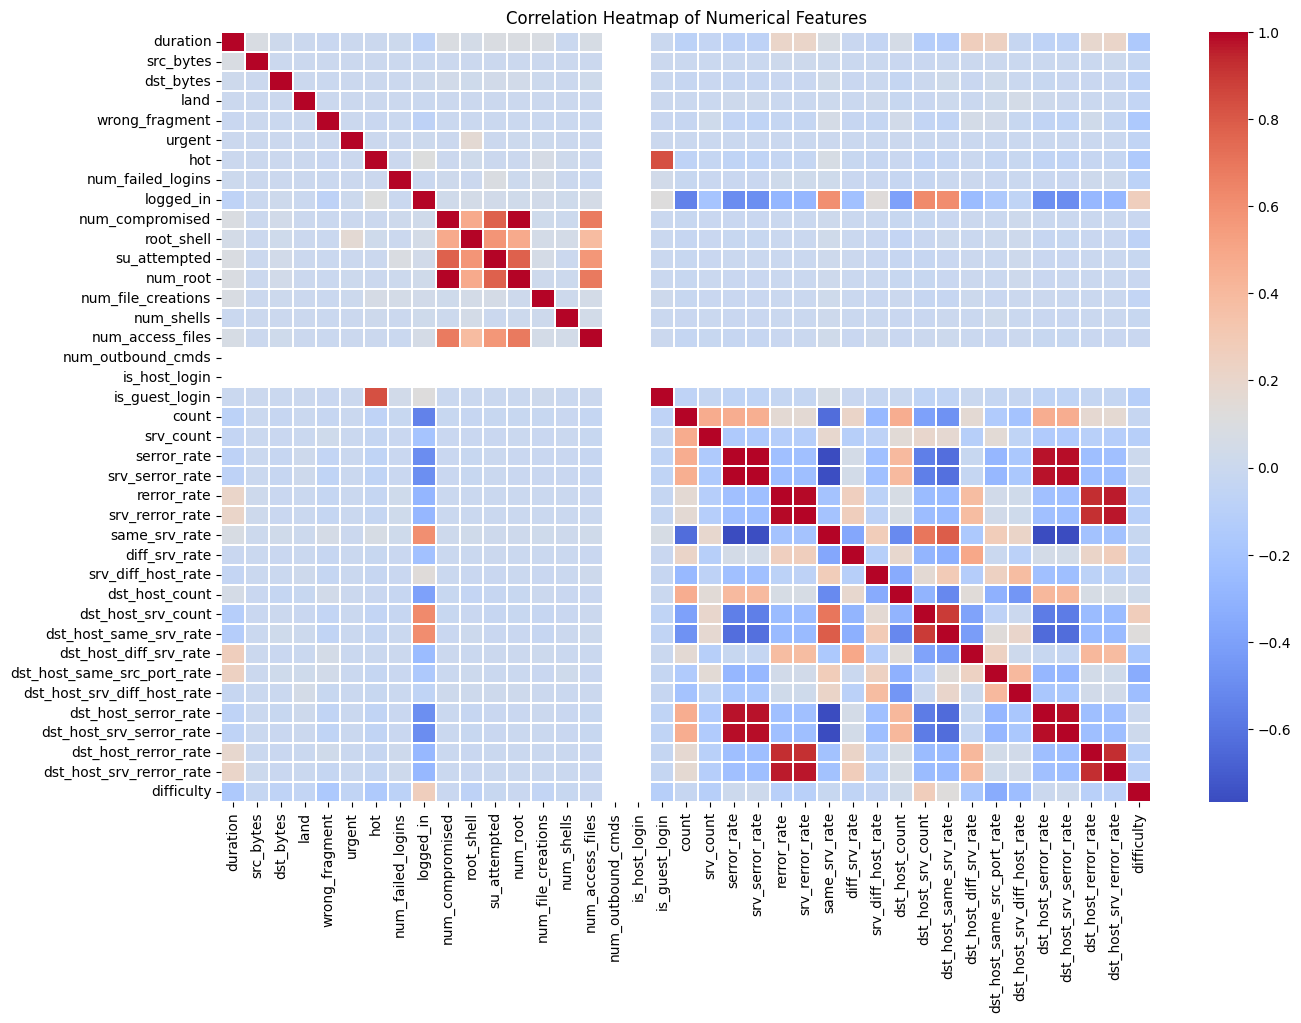

In [ ]:
# 7. Correlation Heatmap
plt.figure(figsize=(15,10))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap="coolwarm",  linewidths=0.1)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [ ]:
# categorical data encoding
le = LabelEncoder()
df["protocol_type"] = le.fit_transform(df["protocol_type"])
df["flag"] = le.fit_transform(df["flag"])
df["service"] = le.fit_transform(df["service"])

In [ ]:
scaler = MinMaxScaler()
numerical_cols = df.select_dtypes(exclude='object').columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [ ]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty,attack_category
0,0.0,0.5,0.292308,0.9,1.286320e-06,0.000000,0.0,0.0,0.0,0.0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,0.952381,Normal
1,0.0,1.0,0.630769,0.9,3.824902e-07,0.000000,0.0,0.0,0.0,0.0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,0.714286,Normal
2,0.0,0.5,0.707692,0.5,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,0.904762,DoS
3,0.0,0.5,0.338462,0.9,6.077927e-07,0.001583,0.0,0.0,0.0,0.0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,1.000000,Normal
4,0.0,0.5,0.338462,0.9,5.213394e-07,0.000082,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,1.000000,Normal


In [ ]:
X = df.drop(["label", "attack_category"], axis=1)
y = df["attack_category"]

In [ ]:
adasyn = ADASYN()
X_res, y_res = adasyn.fit_resample(X, y)

In [ ]:
df1 = pd.concat([X_res, y_res], axis=1)
df1

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty,attack_category
0,0.000000,0.5,0.292308,0.9,1.286320e-06,0.000000,0.0,0.0,0.0,0.000000,...,0.17,0.03,0.170000,0.000000,0.00,0.00,0.05,0.00,0.952381,Normal
1,0.000000,1.0,0.630769,0.9,3.824902e-07,0.000000,0.0,0.0,0.0,0.000000,...,0.00,0.60,0.880000,0.000000,0.00,0.00,0.00,0.00,0.714286,Normal
2,0.000000,0.5,0.707692,0.5,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000,...,0.10,0.05,0.000000,0.000000,1.00,1.00,0.00,0.00,0.904762,DoS
3,0.000000,0.5,0.338462,0.9,6.077927e-07,0.001583,0.0,0.0,0.0,0.000000,...,1.00,0.00,0.030000,0.040000,0.03,0.01,0.00,0.01,1.000000,Normal
4,0.000000,0.5,0.338462,0.9,5.213394e-07,0.000082,0.0,0.0,0.0,0.000000,...,1.00,0.00,0.000000,0.000000,0.00,0.00,0.00,0.00,1.000000,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67229,0.001905,0.5,0.558968,0.9,1.862950e-06,0.000472,0.0,0.0,0.0,0.024835,...,1.00,0.00,0.771935,0.217548,0.00,0.00,0.00,0.00,0.354224,U2R
67230,0.003381,0.5,0.765674,0.9,3.307050e-06,0.000525,0.0,0.0,0.0,0.034018,...,1.00,0.00,0.595147,0.076118,0.00,0.00,0.00,0.00,0.185855,U2R
67231,0.001844,0.5,0.565753,0.9,1.920158e-06,0.000473,0.0,0.0,0.0,0.025136,...,1.00,0.00,1.000000,0.212906,0.00,0.00,0.00,0.00,0.370970,U2R
67232,0.000000,0.5,0.292308,0.9,0.000000e+00,0.001024,0.0,0.0,0.0,0.001916,...,1.00,0.00,1.000000,0.059010,0.00,0.00,0.00,0.00,0.571429,U2R


In [ ]:
df1.shape

(67234, 43)

In [ ]:
df1.duplicated().sum()

np.int64(0)

In [ ]:
print(df["attack_category"].value_counts())
print(df1["attack_category"].value_counts())

attack_category
Normal    13449
DoS        9234
Probe      2289
R2L         209
U2R          11
Name: count, dtype: int64
attack_category
U2R       13451
Normal    13449
DoS       13449
Probe     13443
R2L       13442
Name: count, dtype: int64


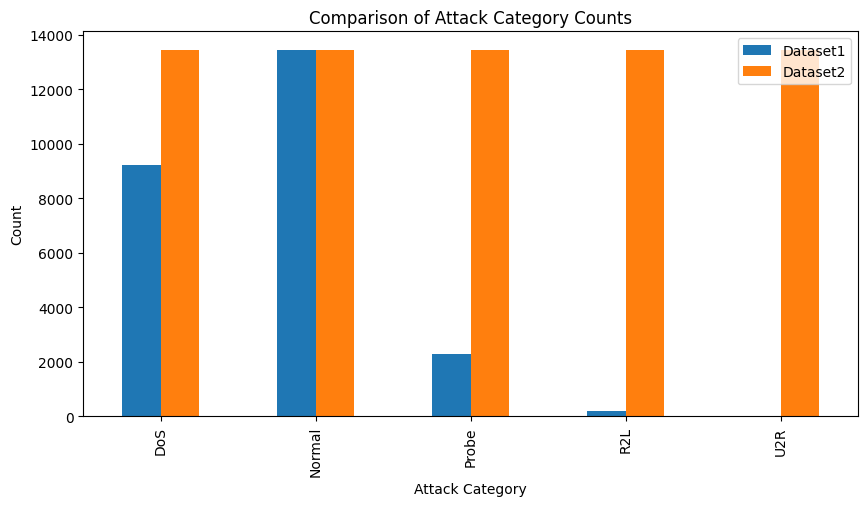

In [ ]:
count1 = df["attack_category"].value_counts()
count2 = df1["attack_category"].value_counts()

# Combine into one dataframe
comparison = pd.DataFrame({
    "Dataset1": count1,
    "Dataset2": count2
}).fillna(0)

# Plot
comparison.plot(kind="bar", figsize=(10,5))
plt.title("Comparison of Attack Category Counts")
plt.xlabel("Attack Category")
plt.ylabel("Count")
plt.show()

In [ ]:
X = df.drop(["label", "attack_category"], axis=1)   # keep only numerical + encoded columns
y = df["attack_category"]                           # target

# Normal train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

Train shape: (20153, 42)
Test shape: (5039, 42)

Train Distribution:
 attack_category
Normal    10759
DoS        7387
Probe      1831
R2L         167
U2R           9
Name: count, dtype: int64

Test Distribution:
 attack_category
Normal    2690
DoS       1847
Probe      458
R2L         42
U2R          2
Name: count, dtype: int64
